# Deep Learning Session 1 - Math behind Deep Learning and Introduction to Keras



### ML Techniques 

_A Broad division_
* **classification:** predict class from observations 

* **clustering:** group observations into
“meaningful” groups

* **regression (prediction):** predict value from observations

### Some Terminology
* **Features**  
  – The number of features or distinct traits that can be used to describe  each item in a quantitative manner. 
* **Samples**  
  – A sample is an item to process (e.g. classify). It can be a document, a picture, a sound, a video, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
* **Feature vector**: An n-dimensional vector of numerical features that represent some object.
*  **Feature extraction**  
 – Preparation of feature vector  
 – Transform the data in the high-dimensional space to a space of fewer dimensions.  
* **Training/Evolution set**
  – Set of data to discover potentially predictive relationships.


# Introduction to Keras

Keras is a **high-level** neural network API, written in Python. It was developed with a focus on enabling **fast experimentation**. 

Any program written with Keras has **5 steps**:
- Define the model
- Compile
- Fit (train)
- Evaluate 
- Predict

Here, we will discuss the implementation of a simple classification task using Keras, with a **softmax**  (logistic) classifier.

## Linear Classifier

A linear classifier uses a score function f of the form $f(x_i,W,b)=Wx_i+b$, where the matrix **W** is called the **weight matrix** and **b** is called the **bias vector**.

## Softmax Classifier

We have a dataset of points $(x_i,y_i)$, where $x_i$ is the input and $y_i$ is the output class.
Consider a linear classifier for which **class scores** *f* can be found as $f(x_i;W) = Wx_i$. For this multi-class classification problem, let us denote the score for the **class j** as $s_j = f(x_i;W)_j$, in short as $f_j$.

Let $z = Wx$. Then the scores for class j will be computed as:
\begin{equation}
s_j(z) = \frac{e^{z_j}}{\Sigma{_k}{e^{z_k}}}
\end{equation}
 This is known as the **softmax function**.



If you’ve heard of the **binary Logistic Regression** classifier before, the Softmax classifier is its generalization to **multiple classes**. The Softmax classifier gives an intuitive output (normalized class probabilities) and also has a probabilistic interpretation that we will describe shortly. In the Softmax classifier, we interpret the scores as the unnormalized log probabilities for each class and have a **cross-entropy loss** that has the form:

\begin{equation}
L_i = -log(\frac{e^{f_{y_i}}}{\Sigma{_j}{e^{f_j}}})
\end{equation}

### Example

Let us consider a dataset with 4 input features and 3 output classes. So, the shape of the **weight matrix** (W) is 3x4 and that of the **input vector** ($x_i$) is 4x1. Therefore, we get an output of shape 3x1, which is given by $Wx+b$. Also, for this particular $x_i$, the **output class** ($y_i$) is 2 ($3^{rd}$ class). 

   ![image](https://i.imgur.com/JU7OQV7.png)

Now we have the **unnormalized** class scores. Now we will take the softmax function of these class scores. Finally, we can observe that the normalized class scores sum to 1. The loss function is given by $-log(s_2(z)) = -log(0.353) = 1.04$.

   ![image](https://i.imgur.com/XYw86Hq.png)


In [0]:
import numpy as np
import tensorflow as tf
import keras
from sklearn.datasets import make_blobs
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.regularizers import L1L2
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


Now that you have understood the concept behind softmax classifier, let's jump into the code.

Let us create our dataset using **scikit-learn's** make_blobs function. The number of points in our dataset is 4000 and we have 4 classes as shown below. The dimension of the data (no.of features) is chosen to be 2, so that it is easy to plot and visualize. In reality, image classification tasks will have a very large number of dimensions.

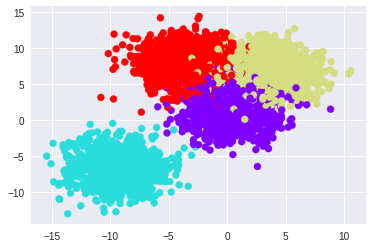

In [0]:
data = make_blobs(n_samples=4000, n_features=2, centers=4, cluster_std=2,random_state=101)
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')
plt.show()

We will use scikit-learn's **train_test_split** function to split our dataset into train and test, with a ratio of 4:1. After this, we will convert our labels (y) into **one-hot** vectors before passing it into our classifier model.

In [0]:
X = data[0]
y = data[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Y_train = np_utils.to_categorical(y_train, 4) 
Y_test = np_utils.to_categorical(y_test, 4)
print("y_train labels: ",y_train)
print("Y_train one-hot labels: \n",Y_train)

y_train labels:  [1 3 3 ... 0 1 2]
Y_train one-hot labels: 
 [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


This is where we will **define our model**. 

The **Sequential** model is a linear stack of layers to which layers can be added using the **add()** function. 

The **Dense** function here, takes 3 parameters - **no.of output classes, input dimension, type of actvation**. 

**Epoch**: One pass of the entire set of training examples.

**Batch size**: Number of training examples used for one pass (iteration).

In [0]:
# Define the model
model = Sequential() 
model.add(Dense(4, input_dim=2, activation='softmax')) 
batch_size = 4
nb_epoch = 10

The **compile** function configures the model for training with the appropriate *optimizer* and *loss function*. Here we have selected categorical cross-entropy loss since it is a multi-class classification problem.

The **fit** function trains the model for the specified number of epochs and batch size. 

The **evaluate** computes the accuracy on the test set after training.

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,verbose=1, validation_data=(X_test, Y_test)) 
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Train on 3200 samples, validate on 800 samples
Epoch 1/10
3200/3200 [==============================] - 1s 327us/step - loss: 0.5000 - acc: 0.7863 - val_loss: 0.3510 - val_acc: 0.8650
Epoch 2/10
3200/3200 [==============================] - 1s 274us/step - loss: 0.3032 - acc: 0.9006 - val_loss: 0.2743 - val_acc: 0.9087
Epoch 3/10
3200/3200 [==============================] - 1s 324us/step - loss: 0.2474 - acc: 0.9234 - val_loss: 0.2436 - val_acc: 0.9187
Epoch 4/10
3200/3200 [==============================] - 1s 321us/step - loss: 0.2197 - acc: 0.9313 - val_loss: 0.2161 - val_acc: 0.9213
Epoch 5/10
3200/3200 [==============================] - 1s 323us/step - loss: 0.2030 - acc: 0.9353 - val_loss: 0.2020 - val_acc: 0.9175
Epoch 6/10
3200/3200 [==============================] - 1s 317us/step - loss: 0.1913 - acc: 0.9372 - val_loss: 0.1948 - val_acc: 0.9263
Epoch 7/10
3200/3200 [==============================] - 1s 330us/step - loss: 0.1841 - acc: 0.9412 - val_loss: 0.1889 - val_acc: 0.9225
E

Now, let us generate the predictions. 

The **predict** function returns a 4-element vector of softmax probabilities for each class. The correct prediction is obtained using numpy's **argmax()** function, which finds the index of the maximum element in the vector.

In [0]:
Y_pred = model.predict(X_test)
print("Softmax predictions: \n",Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print("\nClass with maximum probability: \n",y_pred)

Softmax predictions: 
 [[1.3248611e-03 2.5521611e-09 9.9851722e-01 1.5793661e-04]
 [6.4598355e-03 9.7919554e-05 5.8634079e-04 9.9285591e-01]
 [8.5855442e-01 2.7467676e-02 4.7468939e-03 1.0923109e-01]
 ...
 [5.4721786e-03 9.9292070e-01 1.0090873e-09 1.6071154e-03]
 [1.2989193e-03 6.6605605e-09 9.8468834e-01 1.4012725e-02]
 [3.0959516e-03 9.9689341e-01 8.6714969e-11 1.0548322e-05]]

Class with maximum probability: 
 [2 3 0 3 2 2 2 2 3 0 2 3 0 2 3 0 2 2 1 1 1 2 1 2 2 2 1 2 2 1 2 1 0 1 3 3 1
 0 1 3 1 0 1 1 0 0 3 0 1 1 0 3 2 0 2 2 1 1 1 0 3 0 3 1 0 1 3 2 1 0 1 0 3 3
 2 1 1 1 0 0 2 3 2 3 0 3 2 3 3 1 3 3 0 0 3 1 3 2 1 0 0 2 2 2 3 0 0 3 1 3 1
 2 0 0 1 0 1 3 1 3 2 3 0 0 2 2 0 0 2 2 2 2 3 1 0 1 3 3 0 1 2 3 2 3 0 3 2 2
 2 0 0 1 3 0 1 3 1 1 1 2 3 0 1 3 0 3 2 0 0 3 2 2 3 1 1 1 2 1 0 3 0 1 0 2 2
 2 3 3 3 2 2 1 3 1 3 2 1 3 0 3 3 3 3 1 2 0 3 2 2 0 2 2 0 2 3 2 3 2 0 3 2 3
 0 1 3 3 1 0 3 1 3 1 2 0 3 0 0 2 3 1 1 2 3 0 1 0 1 2 1 1 2 3 3 3 2 0 0 3 1
 2 1 1 0 2 1 0 2 2 3 2 3 3 2 0 2 0 2 1 3 3 2 3 1 3 0 2 2 

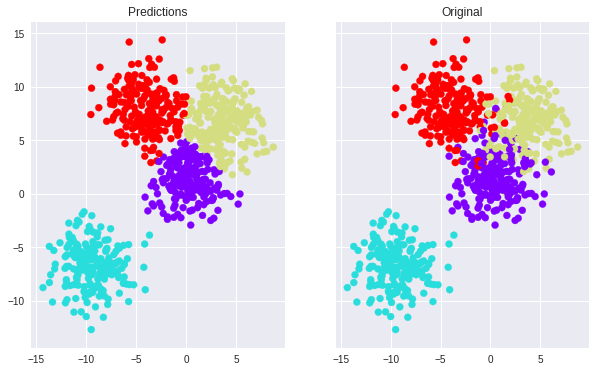

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('Predictions')
ax1.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='rainbow')

### Visualizing the decision boundary 

Let us create a grid of points 10000 in the 2D space between $x = \pm20$ and $y=\pm20$. 

In [0]:
x = np.linspace(-20, 20, 100)
xx, yy = np.meshgrid(x, x)
data = np.dstack((xx,yy))
data = data.reshape(-1,2)
data.shape

(10000, 2)

Now, we will obtain the predictions from the model.

In [0]:
y = model.predict(data)
y_class = np.argmax(y, axis=1)

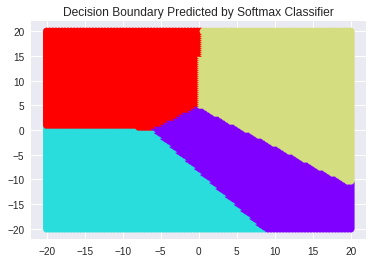

In [0]:
plt.scatter(data[:,0], data[:,1], c=y_class, cmap='rainbow')
plt.title("Decision Boundary Predicted by Softmax Classifier")
plt.show()

## Understanding Linear classifiers

Now, let us make another dataset with make_blobs. But, this will have 2 clusters. 

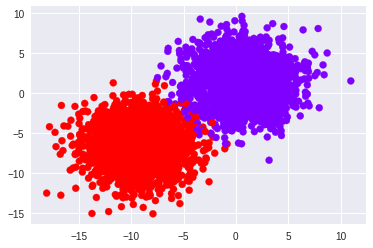

In [0]:
data = make_blobs(n_samples=4000, n_features=2, centers=2, cluster_std=2.5,random_state=101)
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')
plt.show()

Convert to one-hot labels.

In [0]:
X = data[0]
y = data[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Y_train = np_utils.to_categorical(y_train, 2) 
Y_test = np_utils.to_categorical(y_test, 2)
print("y_train labels: ",y_train.shape)
print("Y_train one-hot labels: \n",Y_train.shape)

y_train labels:  (3200,)
Y_train one-hot labels: 
 (3200, 2)


Define the model and train it.

In [0]:
model = Sequential() 
model.add(Dense(2, input_dim=2, name='wx_b'))
model.add(Activation('softmax', name='softmax'))
batch_size = 128
nb_epoch = 100

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,verbose=1, validation_data=(X_test, Y_test)) 
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 3200 samples, validate on 800 samples
Epoch 1/100
3200/3200 [==============================] - 0s 57us/step - loss: 0.6947 - acc: 0.8334 - val_loss: 0.6120 - val_acc: 0.8500
Epoch 2/100
3200/3200 [==============================] - 0s 12us/step - loss: 0.6354 - acc: 0.8397 - val_loss: 0.5565 - val_acc: 0.8550
Epoch 3/100
3200/3200 [==============================] - 0s 11us/step - loss: 0.5799 - acc: 0.8438 - val_loss: 0.5052 - val_acc: 0.8612
Epoch 4/100
3200/3200 [==============================] - 0s 11us/step - loss: 0.5285 - acc: 0.8509 - val_loss: 0.4581 - val_acc: 0.8700
Epoch 5/100
3200/3200 [==============================] - 0s 11us/step - loss: 0.4809 - acc: 0.8569 - val_loss: 0.4148 - val_acc: 0.8762
Epoch 6/100
3200/3200 [==============================] - 0s 11us/step - loss: 0.4367 - acc: 0.8663 - val_loss: 0.3750 - val_acc: 0.8838
Epoch 7/100
3200/3200 [==============================] - 0s 12us/step - loss: 0.3959 - acc: 0.8703 - val_loss: 0.3386 - val_acc: 0.8862
E

 128/3200 [>.............................] - ETA: 0s - loss: 0.0620 - acc: 0.98443200/3200 [==============================] - 0s 13us/step - loss: 0.0617 - acc: 0.9872 - val_loss: 0.0585 - val_acc: 0.9888
Epoch 79/100
3200/3200 [==============================] - 0s 15us/step - loss: 0.0612 - acc: 0.9872 - val_loss: 0.0581 - val_acc: 0.9888
Epoch 80/100
3200/3200 [==============================] - 0s 13us/step - loss: 0.0608 - acc: 0.9872 - val_loss: 0.0577 - val_acc: 0.9888
Epoch 81/100
3200/3200 [==============================] - 0s 13us/step - loss: 0.0604 - acc: 0.9872 - val_loss: 0.0573 - val_acc: 0.9900
Epoch 82/100
3200/3200 [==============================] - 0s 13us/step - loss: 0.0600 - acc: 0.9872 - val_loss: 0.0569 - val_acc: 0.9900
Epoch 83/100
3200/3200 [==============================] - 0s 13us/step - loss: 0.0596 - acc: 0.9872 - val_loss: 0.0566 - val_acc: 0.9900
Epoch 84/100
3200/3200 [==============================] - 0s 13us/step - loss: 0.0592 - acc: 0.9872 - val_loss

# Why should this model work? Why is this equation `Wx+b` is chosen? What's the meaning of this Operation?

# Linear Algebra

### Linear Algebra Intuitions

Lets assume a matrix $\boldsymbol{A}$ of size $N*N$, a column vector $\boldsymbol{x}$ of size $N*1$.


\begin{equation}
y = Ax
\tag{1}
\end{equation}


Let's assume $A$ is a $3*3$ Matrix with its entries as follows,

\begin{equation}
A = 
\begin{bmatrix} 
a_1 & a_2 & a_3 \\ 
b_1 & b_2 & b_3 \\ 
c_1 & c_2 & c_3  
\end{bmatrix}
\tag{2}
\end{equation}

and $x$ to be a column vector ($3*1$)
\begin{equation}
x = 
\begin{bmatrix} 
x_1  \\ 
x_2  \\ 
x_3   
\end{bmatrix}
\tag{3}
\end{equation}

Now lets multiply them and see the resulting output vector,

\begin{equation}
y = Ax = 
\begin{bmatrix} 
a_1 & a_2 & a_3 \\ 
b_1 & b_2 & b_3 \\ 
c_1 & c_2 & c_3  
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix} =
\begin{bmatrix}
a_1x_1 + a_2x_2 + a_3x_3 \\
b_1x_1 + b_2x_2 + b_3x_3 \\
c_1x_1 + c_2x_2 + c_3x_3
\end{bmatrix} = 
\begin{bmatrix}
  x_1
  \begin{pmatrix}
  a_1 \\
  b_1 \\
  c_1
  \end{pmatrix} +
  x_2
  \begin{pmatrix}
  a_2 \\
  b_2 \\
  c_2
  \end{pmatrix} + 
  x_3
  \begin{pmatrix}
  a_3 \\
  b_3 \\
  c_3
  \end{pmatrix}
\end{bmatrix}
\tag{4}
\end{equation} 

So multiplying a matrix with a column vector returns a vector which is a linear combination of its column vectors (as shown above).

* $C(A) = $ It denotes the column space of the matrix $A$. 
* Column space is the span of all the column vectors of Matrix $A$. 

For example,

Lets take,

\begin{equation}
\boldsymbol{A} = 
\begin{bmatrix}
1 & 2 & 3 \\
2 & 3 & 2 \\
3 & 1 & 1
\end{bmatrix}
\end{equation}

\begin{equation}
y = Ax = 
\begin{bmatrix} 
1 & 2 & 3 \\ 
2 & 3 & 2 \\ 
3 & 1 & 1  
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix} =
\begin{bmatrix}
1x_1 + 2x_2 + 3x_3 \\
2x_1 + 3x_2 + 2x_3 \\
3x_1 + 1x_2 + x_3
\end{bmatrix} =
\begin{bmatrix}
  x_1
  \begin{pmatrix}
  1 \\
  2 \\
  3
  \end{pmatrix} +
  x_2
  \begin{pmatrix}
  2 \\
  3 \\
  1
  \end{pmatrix} + 
  x_3
  \begin{pmatrix}
  3 \\
  2 \\
  1
  \end{pmatrix}
\end{bmatrix}
\tag{5}
\end{equation}


\begin{equation}
\boldsymbol{A} = 
\begin{bmatrix}
1 & 2 & 1 \\
1 & 2 & 2 \\
1 & 2 & 3
\end{bmatrix}
\end{equation}


\begin{equation}
y = Ax = 
\begin{bmatrix} 
1 & 2 & 1 \\
1 & 2 & 2 \\
1 & 2 & 3
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix} =
\begin{bmatrix}
1x_1 + 2x_2 + 1x_3 \\
1x_1 + 2x_2 + 2x_3 \\
1x_1 + 2x_2 + 3x_3
\end{bmatrix} =
\begin{bmatrix}
  (x_1 + 2x_2)
  \begin{pmatrix}
  1 \\
  1 \\
  1
  \end{pmatrix} +
  x_3
  \begin{pmatrix}
  1 \\
  2 \\
  3
  \end{pmatrix}
\end{bmatrix}
\tag{6}
\end{equation}

### What does this mean?

This matrix multiplication $\boldsymbol{Ax}$ cannot represent the entire 3-D space as the previous matrix $(5)$, rather what can it represent ??

Since its a linear combination of two 3-D vectors, it actually represents a plane in 3-D space passing through origin if the complete equation is $\boldsymbol{Ax} = 0$

Note the normal to the plane these guys represent in this case is,

\begin{equation}
N = 
\begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix}
\times
\begin{pmatrix}
1 \\
2 \\
3
\end{pmatrix}
\end{equation}

## Why did we do all that?

You guys know that equations can be represented in $Matrix\ form$.

Lets take an example of 3 simultaneous equations,

\begin{equation} 3x + 5y + z = 1\\ 7x – 2y + 4z = 5\\ -6x + 3y + 2z = 10 \end{equation}

Whats its matrix representation ?

\begin{equation}
\begin{bmatrix}
3 & 5 & 1 \\
7 & -2 & 4 \\
-6 & 3 & 2
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
z
\end{bmatrix} = 
\begin{bmatrix}
1 \\
5 \\
10
\end{bmatrix} = 
\begin{bmatrix}
  x
  \begin{pmatrix}
  3 \\
  7 \\
  -6
  \end{pmatrix} +
  y
  \begin{pmatrix}
  5 \\
  -2 \\
  3
  \end{pmatrix} + 
  z
  \begin{pmatrix}
  1 \\
  4 \\
  2
  \end{pmatrix}
\end{bmatrix}
\tag{7}
\end{equation}

## Linear Transformations

In [0]:
def transform(A, x, y, bias = ([0,0])):
  '''
  Parameters
  ----------
  A : Matrix that transforms the space
  x: x_coordinates
  y: y_coordinates
  bias: Bias vector to be added
  
  Returns
  -------
  transformed: The transformed space, ([x_trans, y_trans])
  max_value: The maximum value of the distorted + input space
  '''
  input_matrix = np.vstack((x, y))
  transformed = (A.dot(input_matrix).T + bias).T
  max_value = np.hstack((input_matrix, transformed)).max()
  return transformed, max_value

We will show the transformations that matrix multiplication does using an ellipse or a circle. Remember the parametric coordinates of an ellipse and circle?

**Parametric Equations of an Ellipse**

\begin{equation}
x = acos(\theta)\\
y = bsin(\theta)\\
\theta\  \epsilon\ [0,2\pi]
\end{equation}

\\

We will use this to plot an ellipse and apply transformations to these coordinates and see the transforms and try to gain intuitions.

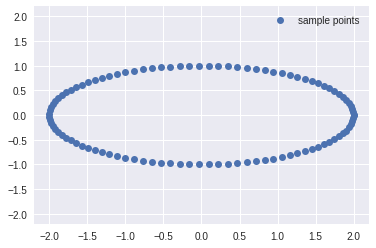

In [0]:
t = np.linspace(0, 2*np.pi, 100)

x_c = 2*np.cos(t)
y_c = np.sin(t)
x_matrix = np.vstack((x_c, y_c))
max_value = x_matrix.max()

plt.plot(x_c, y_c, 'o', label = 'sample points')
plt.legend(loc = 'best')
plt.xlim(-1.1*max_value, 1.1*max_value)
plt.ylim(-1.1*max_value, 1.1*max_value)
plt.show()

Lets define a $2-D\ Matrix\ A$ 

\begin{equation}
A = 
\begin{bmatrix}
cos\theta & -sin\theta \\
sin\theta & cos\theta
\end{bmatrix}
\end{equation}

Remember what this matrix does?

Its a Rotating Matrix, which rotates the space without scaling it. We will see the meanings of these terms shortly. 

\begin{equation}
Ax = 
\begin{bmatrix}
cos\theta & -sin\theta \\
sin\theta & cos\theta
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix} = 
\begin{bmatrix}
xcos\theta - ysin\theta \\
xsin\theta + ycos\theta
\end{bmatrix} = 
\begin{bmatrix}
x^{'} \\
y^{'}
\end{bmatrix}
\end{equation}

Whats the **determinant** of this Rotation Matrix?
\begin{equation}
|A| = 
\begin{vmatrix}
cos\theta & -sin\theta \\
sin\theta & cos\theta
\end{vmatrix} =
cos^{2}\theta + sin^{2}\theta = 1 
\end{equation}

*Determinants* are related to the volume change during matrix transformation.
  * $|A| = 1$ => Volume of any closed surface in the space is conserved. The distortion caused by matrix in the space is preserving volume. No closed surface expands or contracts in this transform. 

  * $|A| > 1$ => Volume of any closed surface in space increases. 
  
  * $|A| = 0$ => Closed surface volume reduces to 0.
![rotaion_description](http://jcsites.juniata.edu/faculty/rhodes/graphics/images/rotate1.gif)

This image describes the why this matrix is called **Rotation matrix** in 2D.

If the input column vector $x$ is taken to represent coordinates of a point in 2D space, then after 
doing the transformation ((i.e) multiplying with matrix $A$),

We get the rotated point represented as $[x^{'}, y^{'}]$ in this image. 

Now we have analysed this matrix transformation for one point. What will happen to a set of points in 2-D space?


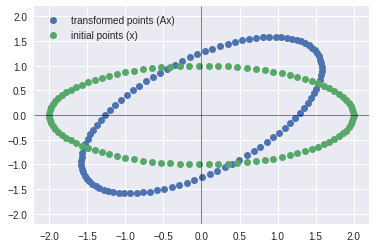

In [0]:
theta = np.pi/4
A = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

y_matrix, max_value = transform(A, x_c, y_c)

plt.plot(y_matrix[0], y_matrix[1], 'o', label = 'transformed points (Ax)')
plt.plot(x_c, y_c,'o', label = 'initial points (x)')
plt.legend(loc = 'best')
plt.xlim(-1.1*max_value, 1.1*max_value)
plt.ylim(-1.1*max_value, 1.1*max_value)
plt.axvline(linewidth=0.5, color = 'k')
plt.axhline(linewidth=0.5, color = 'k')
plt.show()

Observations:

* Entire Ellipse (Represented in blue) is rotated with respect to the initial ellipse (green one) by the angle $\theta$ we specified in the code ($\frac{\pi}{4}$).

Inferences:

* Matrix rotate the space. (If Rotation is only desired, keep the determinant 1)

In [0]:
t = np.linspace(0, 2*np.pi, 100)

x_c = np.cos(t)
y_c = np.sin(t)
x_matrix = np.vstack((x_c, y_c))
max_value = x_matrix.max()

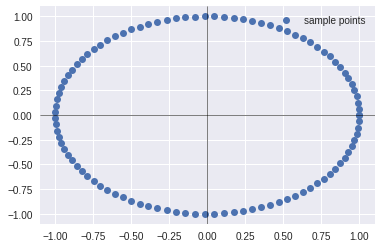

In [0]:
plt.plot(x_c, y_c, 'o', label = 'sample points')
plt.legend(loc = 'best')
plt.xlim(-1.1*max_value, 1.1*max_value)
plt.ylim(-1.1*max_value, 1.1*max_value)
plt.axvline(linewidth=0.5, color = 'k')
plt.axhline(linewidth=0.5, color = 'k')
plt.show()

Now, lets take this matrix and study its transform abilities.

\begin{equation}
A = 
\begin{bmatrix}
2 & 0 \\
0 & 1
\end{bmatrix}
\end{equation}

Whats the determinant of this matrix?

\\

\begin{equation}
|A| = 
\begin{vmatrix}
2 & 0 \\
0 & 1
\end{vmatrix} = 
2
\end{equation}

\\
\begin{equation}
Ax = 
\begin{bmatrix}
2 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix} = 
\begin{bmatrix}
2x \\
y
\end{bmatrix}
\end{equation}


What does this mean?

\begin{equation}
\begin{bmatrix}
x \\
y
\end{bmatrix} \longrightarrow
\begin{bmatrix}
2x \\
y
\end{bmatrix}
\end{equation}

This streches the space along x direction, preserving y direction.

## Eigen Decomposition

An ** *Eigenvector* ** of a square matrix $\boldsymbol{A}$ is  a non-zero vector $\boldsymbol{v}$ such that transformation by $\boldsymbol{A}$ (multiplication by $\boldsymbol{A}$) only scales the vector $\boldsymbol{v}$ by a factor $\boldsymbol{\lambda}$ which is its ** *EigenValue* **.

\begin{equation}
\boldsymbol{A}v = \lambda v
\end{equation}

So, if we find **eigenvectors** of matrix $A$, we can say that those directions are the directions that will be only **scaled** by the transformation by this matrix (Scaled by its eigenvalue). All the other directions other than eigenvector directions, will be **both** scaled and rotated, to maintain **continuity of the transformation**.

If $\boldsymbol{v}$ is an eigenvector of $\boldsymbol{A}$, and has an eigenvalue $\lambda$, whats the eigenvalue of $c\boldsymbol{v}$, c is a constant?

Its also $\lambda$ right? So we use unit normalized eigenvectors.

Suppose matrix $\boldsymbol{A}$ has $n$ independent eigenvectors, { $v^{(1)}, v^{(2)}, v^{(3)}, ....., v^{(n)}$ } with its corresponding eigenvalues, { $\lambda_{1}, \lambda_{2}, ......, \lambda_{n}$ }.

Then, we can concatenate all the eigenvectors into a single matrix called $\boldsymbol{V}$, which can be represented as

\begin{equation}
\boldsymbol{V} = 
\begin{bmatrix}
 \vdots & \vdots & \vdots & \vdots \\
 v^{(1)} & v^{(2)} & \cdots & v^{(n)}\\
 \vdots & \vdots & \vdots & \vdots
\end{bmatrix}_{n\times n}
\end{equation}

We can define a diagonal matrix, where each diagonal entry is $\lambda_{i}$ corresponsing to $v^{(i)}$.

\begin{equation}
diag(\lambda) = 
\begin{pmatrix}
    \lambda_{1}\\
    &\lambda_{2}\\
    && \lambda_{3}\\
    &&& \cdots\\
    &&&& \lambda_{n}
\end{pmatrix}_{n\times n}
\end{equation}


Then matrix $\boldsymbol{A}$ can be reconstructed from these matrices $\boldsymbol{V}$ and $\boldsymbol{diag(\lambda)}$ using $\boldsymbol{Eigendecomposition}$ of $\boldsymbol{A}$, which is given by,

\begin{equation}
\boldsymbol{A} = \boldsymbol{V}diag\boldsymbol{(\lambda)}\boldsymbol{V}^{-1}
\end{equation}

Whats the use of this?

* We can *construct* matrix with specific **eigenvectors** and **eigenvalues** that allows us to stretch the space in desired directions.
* We can design specific matrices that can distort the space in such a way that data becomes easily separable so that our classifier can separate the data easily. ** Now you get the point of why we did  all this ! **

We want to create matrix that can distort the space in such a way that we want our data to get sepatated.

* ** Neural Nets distort the input data in high dimentional space using these matrix multiplications, (Apply activations in middle), until the data becomes linearly separable.**
* ** These distortions can be analysed by eigen decomposition and singular value decomposition of weight matrices of the layers of Deep neural nets.** 

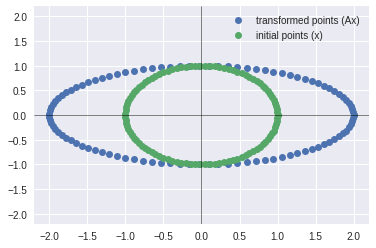

In [0]:
A = np.array([[2,0],[0,1]])
y_matrix, max_value = transform(A, x_c, y_c)
plt.plot(y_matrix[0], y_matrix[1], 'o', label = 'transformed points (Ax)')
plt.plot(x_c, y_c,'o', label = 'initial points (x)')
plt.legend(loc = 'best')
plt.xlim(-1.1*max_value, 1.1*max_value)
plt.ylim(-1.1*max_value, 1.1*max_value)
plt.axvline(linewidth=0.5, color = 'k')
plt.axhline(linewidth=0.5, color = 'k')
plt.show()

In [0]:
def eigen_decomposition(A, x, y, scale_by_eigen = False, bias = np.array([0,0])):
  y_matrix, max_value = transform(A, x, y, bias)
  W, V = np.linalg.eig(A)
  SCALE = 10
  # print (V.shape, W.shape)
  if scale_by_eigen:
    V[:,range(len(W))]*= W   # Multiplying the EigenVector with Eigenvalue
  no_of_points =  len(V[:,0])
  plt.quiver(np.zeros(no_of_points),np.zeros(no_of_points)  , V[0], V[1],color = ['r', 'b'], scale = SCALE, label = 'Eigen Vectors')
  plt.plot(y_matrix[0], y_matrix[1], 'o', label = 'transformed points (Ax)')
  plt.plot(x, y,'o', label = 'initialnp.array(bias) points (x)')
  plt.xlim(-1.1*max_value, 1.1*max_value)
  plt.ylim(-1.1*max_value, 1.1*max_value)
  plt.axvline(linewidth=0.5, color = 'k')
  plt.axhline(linewidth=0.5, color = 'k')
  plt.quiver([0], [0], bias[0], bias[1], scale = 21, label = 'Bias Vector')
  plt.legend(loc = 'best')
  return W, V, y_matrix

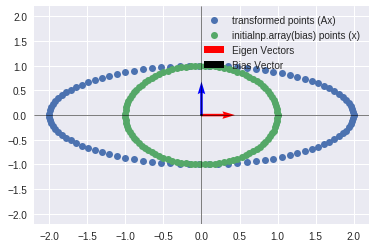

In [0]:
w_1, v_1, y_matrix_1 = eigen_decomposition(A, x_c, y_c)

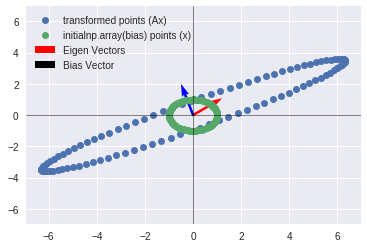

In [0]:
A = np.array([[6,2],[3,2]])
w_2, v_2, y_matrix_2 = eigen_decomposition(A, x_c, y_c)

**Obseravtions**:

* The vectors near to eigenvectors do not rotate that much. They get scaled by the eigenvalue (if its an eigenvector, else a small rotation is present).
* Vectors that are far away from either of the eigenvectors are severly rotated and scaled. (Maintain the continuity of the figure)
* Volume has increased greater than the initial circle, which indicates that the determinant of the matrix is greater than 1.

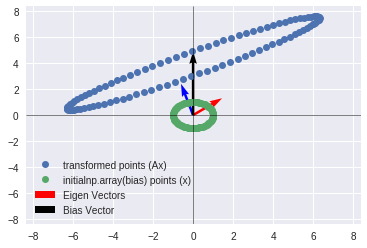

In [0]:
bias = [0,4]
w_2b, v_2b, y_matrix_2b = eigen_decomposition(A, x_c, y_c, bias = bias)

Observations:

* Other than other observations (listed in the previous plot), we can see the bias has just shifted the distorted figure along that direction (bias vector's direction).

So we get the answer of why bias is needed?

This is because, if bias is not added we are restricted with origin as center. Its similar to

\begin{equation}
y = mx + b
\end{equation}

where b acts as a bias. If $b = 0$, we will be restricted to use only lines which pass through origin. 

\begin{equation}
y = mx
\end{equation}

So addition of bias gives **extra freedom** to move anywhere in the space ($translation$), multiplying with the weight matrix enables the model to $distort$, $scale$, $rotate$ the space (with center at $origin$) the space.

So Neural Net basicaly $moves$ (bias), $distorts$ data points by $scaling$ and $rotating$ them (weights) in hyperdimentional space, **with an aim to find a transformation to make the data linearly separable at the end**. 

In [0]:
# What if determinant is 0?
A = np.array([[3,2],
              [3,2]])

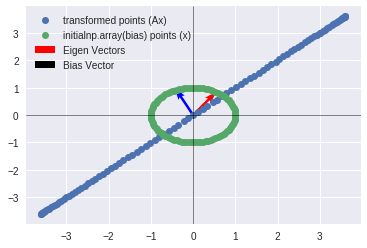

In [0]:
w_3, v_3, y_matrix_2 = eigen_decomposition(A, x_c, y_c)

Observation:
  * Determinant of the transformation matrix is 0. 
  * The space is completely contracted along one-dimension, causing it to lose all of its volume.

In [0]:
# What if determinant is < 0?
A_plus = np.array([[6,2],
                   [3,2]])

A_minus = np.array([[-6,-2],
                   [3,2]])

x = np.linspace(-1,1,10)
y = x**2

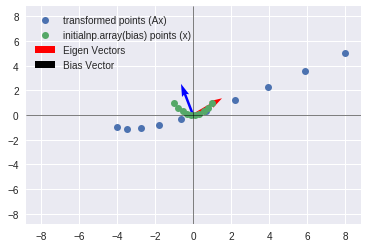

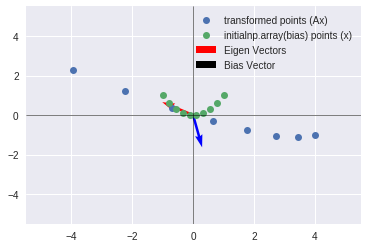

In [0]:
w_3, v_3, y_matrix_3 = eigen_decomposition(A_plus, x, y)
plt.show()
w_4, v_4, y_matrix_4 = eigen_decomposition(A_minus, x, y)

When Determinant is less than zero we get a reflection about y axis but the deformation is same (except the reflection).

Now that we have an Idea about `Linear Algebra` now analyse,

# What has happened to our data as it `propogates forward` through this classifier

Retrieve the weights and biases from the learned model.

In [0]:
w_dense = (model.layers[0].get_weights()[0])
b_dense =  (model.layers[0].get_weights()[1])

Let us visualize the weights and bias terms which have been learned.

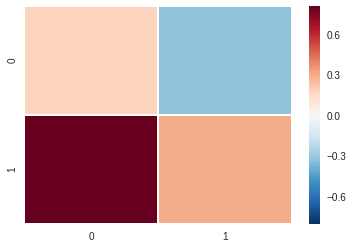

[[ 0.18243906 -0.32536864]
 [ 0.80486184  0.29774043]]


In [0]:
sns.heatmap(w_dense, linewidth=0.5)
plt.show()
print (w_dense)

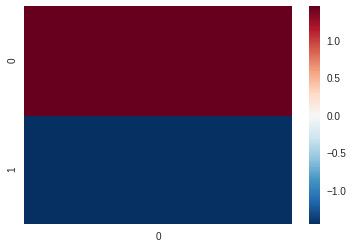

[ 1.4485976 -1.4485976]


In [0]:
sns.heatmap(b_dense.reshape((2,1)))
plt.show()
print (b_dense)

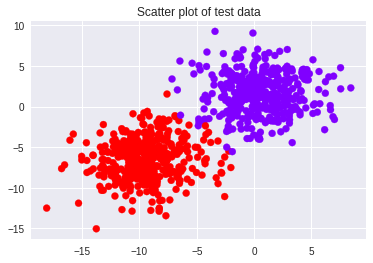

In [0]:
plt.scatter(X_test[:,0], X_test[:,1], c = Y_test[:,1], cmap='rainbow')
plt.title('Scatter plot of test data')
plt.show()

Take dot product of W and *X _test*.

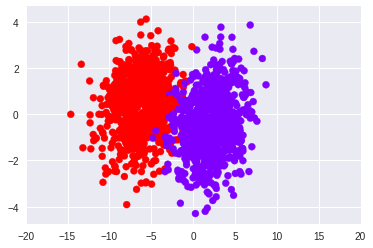

In [0]:
wx = X_test.dot(w_dense)
wx_b = wx + b_dense
plt.scatter(wx_b[:,0], wx_b[:,1], c=Y_test[:,1], cmap='rainbow')
plt.scatter(wx[:,0], wx[:,1], c=Y_test[:,1], cmap='viridis')
plt.quiver([0], [0], b_dense[0], b_dense[1], scale = 21, label = 'Bias Vector',color='w')
plt.legend(loc='best')
plt.xlim([-20, 20])
plt.show()

### Visualizing the predictions

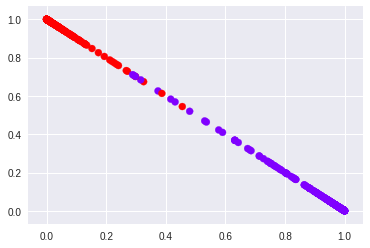

In [0]:
y = model.predict(X_test)
plt.scatter(y[:,0], y[:,1], c=Y_test[:,1], cmap='rainbow')

# Whats Regression?

## Regression using Neural Nets

In [0]:
def create_dataset(f, x=None, std=0.1):
  if x is None:
    x = np.linspace(-20, 20, 1000)
  
  noise = np.random.randn(len(x))*std
  y = f(x)+noise
  return (x,y)

def regress_fn(x):
  return 1/(1 + np.exp(x))

In [0]:
x,y = create_dataset(regress_fn)

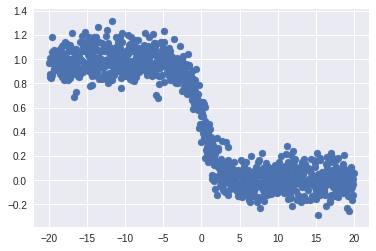

In [0]:
plt.scatter(x,y)
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

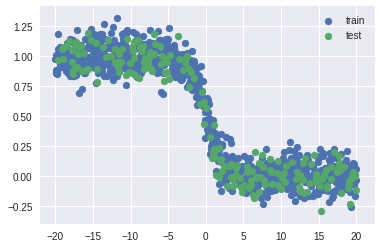

In [0]:
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend(loc='best')
plt.show()

In [0]:
model = Sequential() 
model.add(Dense(10, input_dim=1, activation='sigmoid')) 
model.add(Dense(1))
batch_size = 100
nb_epoch = 100

In [0]:
model.compile(optimizer='sgd', loss='mean_squared_error') 
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch,verbose=1, validation_data=(X_test, y_test)) 
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score)

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 1s 682us/step - loss: 0.2589 - val_loss: 0.1697
Epoch 2/100
800/800 [==============================] - 0s 28us/step - loss: 0.1032 - val_loss: 0.0700
Epoch 3/100
800/800 [==============================] - 0s 23us/step - loss: 0.0445 - val_loss: 0.0390
Epoch 4/100
800/800 [==============================] - 0s 20us/step - loss: 0.0288 - val_loss: 0.0297
Epoch 5/100
800/800 [==============================] - 0s 22us/step - loss: 0.0243 - val_loss: 0.0259
Epoch 6/100
800/800 [==============================] - 0s 20us/step - loss: 0.0225 - val_loss: 0.0239
Epoch 7/100
800/800 [==============================] - 0s 23us/step - loss: 0.0215 - val_loss: 0.0227
Epoch 8/100
800/800 [==============================] - 0s 20us/step - loss: 0.0208 - val_loss: 0.0217
Epoch 9/100
800/800 [==============================] - 0s 24us/step - loss: 0.0201 - val_loss: 0.0210
Epoch 10/100
800/800 [=============

100/800 [==>...........................] - ETA: 0s - loss: 0.0131800/800 [==============================] - 0s 24us/step - loss: 0.0118 - val_loss: 0.0129
Epoch 85/100
800/800 [==============================] - 0s 21us/step - loss: 0.0118 - val_loss: 0.0129
Epoch 86/100
800/800 [==============================] - 0s 16us/step - loss: 0.0118 - val_loss: 0.0128
Epoch 87/100
800/800 [==============================] - 0s 23us/step - loss: 0.0118 - val_loss: 0.0129
Epoch 88/100
800/800 [==============================] - 0s 21us/step - loss: 0.0118 - val_loss: 0.0128
Epoch 89/100
800/800 [==============================] - 0s 21us/step - loss: 0.0118 - val_loss: 0.0128
Epoch 90/100
800/800 [==============================] - 0s 23us/step - loss: 0.0118 - val_loss: 0.0128
Epoch 91/100
800/800 [==============================] - 0s 26us/step - loss: 0.0118 - val_loss: 0.0128
Epoch 92/100
800/800 [==============================] - 0s 24us/step - loss: 0.0117 - val_loss: 0.0128
Epoch 93/100
800/800 

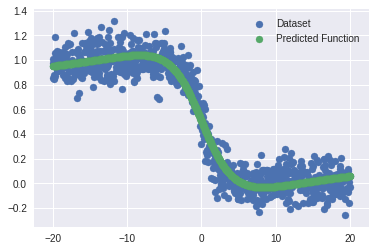

In [0]:
x = np.linspace(-20,20,1000)
y = model.predict(x)
plt.scatter(X_train, y_train, label='Dataset')
plt.scatter(x, y, label='Predicted Function')
plt.legend(loc='best')
plt.show()

# Whats the loss function we used for training our softmax classifier? Why did we use that?

To answer that we need the help of **Probability and Information Theory**, lets dive in.

# Probability and Information Theory

- Probablity is a mathematical Statement to represent `Uncertain Statements`.

- While probability theory allows us to make uncertain statements and reason the presence of uncertainty, `Information Theory` allows us to quantify the amount of uncertainty present in a probability distribution.

## Why do we need this topic?

To answer these questions....

- Why cross entropy?
  - Why minimizing that trains my network?
- Uses of One-Hot Encoding
and many more...

## This is the output probability vector expected. (The labels in classification problem)
![one-hot](https://www.tensorflow.org/images/feature_columns/categorical_column_with_identity.jpg)

## This is the network predicts (output softmax). 
![nn-prob](https://raw.githubusercontent.com/rohan-varma/rohan-blog/gh-pages/images/neuralnet.png)

### Clearly these 2 are 2 probability distributions and we need to minimize the information content/ `distance` between these 2 distribution.

## Random Variables



*   **Random Variable** is a variable that can take different values /states with likelihood of taking each state represented by a probability distribution.
*   For example, lets say $x$ is a random variable which can take values $x_1$, $x_2$. Then the states/values of the random variable $x$ is $x_1$, $x_2$ and likelihood of $x$ taking one of this state is described by a probability distribution.

* Example, lets random variable $x$ represent the outcome of tossing a coin. 

![Probability Distribution of coins tossing](https://www.sumproduct.com/fileadmin/filemount/Thought_Files/N-Z/Image-01-No.-of-Heads-from-1-Coin-Toss.gif)



## Probability Distribution

A **probability distribution** is a description of how likely a random variable or set of random variables is to take of its possible states.



![pmf](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzduXzRL_TjNY9mGF7SSDMj5J1p-io6Ck5_5vWNC6hR_zs2hLY)


## Expectation of a Random Variable

![discrete_expectation](http://www.onekobo.com/Articles/Statistics/statsImgs/image204c.gif)

![contin_expectation](http://output.to/sideway/images/knowledge/mathematics/calculus/014/integral_d_04o.png)


## Find the expectation of random variable following these distribution

Lets say $X$ follows this distribution. Then find $E[X]$ and $E[X^2]$.

![uniform_distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/1200px-Uniform_Distribution_PDF_SVG.svg.png)



\begin{equation}
E[X] = \int_{-\infty}^{\infty}xP(x)dx = \int_{a}^{b}\ x\ \frac{1}{b-a}\ dx
\end{equation}

\begin{equation}
E[X] = \frac{1}{b-a} \int_{a}^{b}\ x\ dx = \frac{a+b}{2}
\end{equation}

\begin{equation}
E[X^2] = \int_{-\infty}^{\infty}x^2P(x)dx = \int_{a}^{b}\ x^2\ \frac{1}{b-a}\ dx
\end{equation}

\begin{equation}
E[X^2] = \frac{1}{b-a}\ \int_{a}^{b}\ x^2\ dx = \frac{a^2 + ab + b^2}{3}
\end{equation}

## Find the expectation of random variable following these distribution

Lets say $X$ follows this distribution. Then find $E[X]$.


![exponential_distribution](https://www.phy.ornl.gov/csep/gif_figures/mcf6.gif)


![expected_value_exp_dist](https://www.statlect.com/images/exponential-distribution__64.png)


## Information Theory

This is the branch of applied mathematics that revolves around quantifying how much information  is present in the signal.

**Basic Idea**

- Likely events should have low information content, and in the extreme case the events that are guaranteed to happen should have no information whatsoever.

- Events that are more unlikely should have higher information content.

- Independent events should have additive information.

## Can you think of a function of probability of an event that satisfies all the above constraints ?

Let $I(x)$ denote the information carried by event **x** and probability of $x$ happening is $p(x)$.

$p(X = x) \uparrow \implies I(X = x) \downarrow $

If x, y are 2 Independent events, the let 

\begin{equation}
P(X = x,Y = y) = P(X = x)P(Y = y)
\end{equation}

Similarly, information you get by observing $X = x, Y = y$ is

\begin{equation}
I(X = x, Y = y) = I(X = x) + I(Y = y)
\end{equation}

This function satisfies all constraints, we define the **self-information** of an event $X=x$ to be

\begin{equation}
I(x) = H(P) = -logP(x)
\end{equation}

$log$ is natural logarithm with base $e$.

- Units of **nats**
  - One nat is the amount of information gained by observing an event of probability $\frac{1}{e}$
 
- Other Units include **bits**or **shannons** (where the log is replaced with base-2)

Self information deals only with single outcome. 

- To quantify the amount of uncertainty in an entire *probability distribution* we use **Shannon Entropy** which is defined as,

\begin{equation}
H(x) = E_{x \epsilon P}[I(x)] = - E_{x \epsilon P}[logP(x)]
\end{equation}

\begin{equation}
H(x) = -\sum_{x = -\infty}^{x = \infty}P(x)\ logP(x)
\end{equation}

\begin{equation}
H(x) = -\int_{-\infty}^{+\infty}P(x)\ log[P(x)]\ dx
\end{equation}

Shannon entropy describes the expected amount of information that can be drawn from that distribution.

![shannon_entropy](https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Mplwp_shannon_entropy.svg/2000px-Mplwp_shannon_entropy.svg.png)

Whats the Shannon Entropy of these distributions?

1)

![dirac_distribution](http://www.matrixlab-examples.com/image-files/impulse-function-003.gif)



1) This is a certain distribution, therefore there is no randomness involved in any form whatsoever.  So entropy is $0$.

\begin{equation}
H(x) = -\sum_{x = -\infty}^{x = \infty}P(x)\ logP(x)
\end{equation}
 
 \begin{equation}
H(x) = -1\ log\ 1 = 0
\end{equation}


2) 


![Uniform Distribution](http://www.a-levelmathstutor.com/images/statistics/graph-discrete-uniform-dist.jpg)



2) This is uniform distribution, wherein you dont know anything about the system (all are random). This contains distribution contains the least possible information and hence must have high entropy.

\begin{equation}
H(x) = -\sum_{x = -\infty}^{x = \infty}P(x)\ logP(x)
\end{equation}

\begin{equation}
H(x) = -\sum_{x = 1}^{x = 6} \frac{1}{6}\ log\frac{1}{6} = log_e\ 6 = 1.792 
\end{equation}


3)


![gaussian Distribution](http://formulaforge.com/FVimages/BellCurve/BellCurve.jpg)



3) This is gaussian distribution. Whats the means and standard deviation? Its a continuous distribution, so we must use the continuous random variable formula.

\begin{equation}
H(x) = -\int_{-\infty}^{+\infty}P(x)\ log[P(x)]\ dx
\end{equation}

\begin{equation}
H(x) = -\int_{-\infty}^{+\infty}\ \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}\ \ log[\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}]\ dx
\end{equation}

\begin{equation}
H(x) = -\int_{-\infty}^{+\infty} P(x)log(\frac{1}{\sqrt{2\pi}})dx + \int_{-\infty}^{+\infty}P(x)\frac{x^2}{2}dx
\end{equation}

\begin{equation}
H(x) = -log(\frac{1}{\sqrt{2\pi}}) + \frac{1}{2}E[X^2]
\end{equation}

Using this identity, 

\begin{equation}
E(X^2)=\text{Var}(X)+[E(X)]^2
\end{equation}

\begin{equation}
E(X^2) = 1^2 + 0
\end{equation}

\begin{equation}
H(x) = \frac{1}{2}log(2\pi) + \frac{1}{2} = 1.4189
\end{equation}


If you have two separate probability distributions $P(X)$ and $Q(X)$ over the same random variable $x$, we can measure how different these 2 distributions are by using **$Kullback-Leibler\ (KL)\ Divergence$** or $Relative-Entropy$ which is defined as,

\begin{equation}
D_{KL}(P||Q) = E_{x \epsilon\ P}[log \frac{P(x)}{Q(x)}] = E[logP(x) - logQ(x)]
\end{equation}

![kl-image](https://wikimedia.org/api/rest_v1/media/math/render/svg/edb367bbf4e752286ef6d712159ce43fea17a2bd)


![continuous-kl](https://wikimedia.org/api/rest_v1/media/math/render/svg/526682a951093613fe4c721db57b68ec991bdf07)

**Properties of KL-Divergence**:

- Notion of distance between 2 Probability distributions 

- In context of $ML$, $D_{KL}(P||Q)$ is often called the information gain achieved if $Q$ is used instead of $P$.

- In $Bayesian\ Inference$ KL divergence can be a measure of the information one gains be refining ones belief (prior) distribution $Q$ to the posterior distribution $P$. In other words, amount of information lost when you choose to approximate $P$ using $Q$.

- Generally,
  - $P$ represents `true` data distribution. The probability distribution which generated this data, the theoritical one.
  - $Q$ represents the `model` probability distribution, which is used to `fit` / `model` the probability distribution of the data. (Approximation of $P$)

## Example:
$
\Omega = \{A,B\}, P(A) = 0.2, P(B) = 0.8, Q(A) = Q(B) = 0.5
$

**Calculate the following**


$
1)\ KL(P,Q) = P(A)\log \frac{P(A)}{Q(A)} + P(B) \log \frac{P(B)}{Q(B)}
$

$
2) KL(Q,P) = Q(A)\log \frac{Q(A)}{P(A)} + Q(B) \log \frac{Q(B)}{P(B)}
$

## Answers
$
KL(P,Q) = P(A)\log \frac{P(A)}{Q(A)} + P(B) \log \frac{P(B)}{Q(B)} \approx 0.19
$

$
KL(Q,P) = Q(A)\log \frac{Q(A)}{P(A)} + Q(B) \log \frac{Q(B)}{P(B)} \approx 0.22
$


Note:
$
KL(P,Q) \neq KL(Q,P)
$

## If KL Divergence becomes 0, this means $P$ and $Q$ are almost same everywhere.

Another Quantity called **Cross-Entropy** related to KL Divergence is defined as 

\begin{equation}
H(P,Q) = H(P) + D_{KL}(P||Q) = -E_{x\ \epsilon\ P}\ logQ(x)
\end{equation}

\begin{equation}
H(P,Q) =  - E_{x\ \epsilon\ P}[logP(x)] + E_{x\ \epsilon\ P}[logP(x) - logQ(x)]
\end{equation}

In discrete case, 


![cross_entropy](https://wikimedia.org/api/rest_v1/media/math/render/svg/0cb6da032ab424eefdca0884cd4113fe578f4293)

- Here $Q(X)$ is our attempt to model the distribution which created the data ($P(X)$).

![example_cross_entropy](https://theneuralperspective.files.wordpress.com/2016/10/screen-shot-2016-11-06-at-8-13-41-pm.png?w=620)

![another_exmaple](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/img/1d8fc59e6a674f1c.png)

### What we do when we train a neural network?

We change the weights, biases and other parameters if any. So we are trying to change $Q(X)$ such that it models with $P(X)$ the true distribution which created the dataset we are using to train.

So $P(X)$ is something which is **unmoving and fixed**. By changing weights and biases we can change only the model's representation which is $Q(X)$ in a belief to get closer to $P(X)$ which is the true distribution.


So, minimizing cross-entropy with respect to Q (modelled by weight and biases) is equivalent to **minimizing KL DIvergence**.

# Iris flower species classification

Download the dataset from here: https://www.kaggle.com/uciml/iris and extract it.

This dataset is used to classify flowers of species iris into 3 classes - setosa, virginica, versicolor.


In [1]:
#Uploading the required images
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Iris.csv to Iris.csv
User uploaded file "Iris.csv" with length 5107 bytes


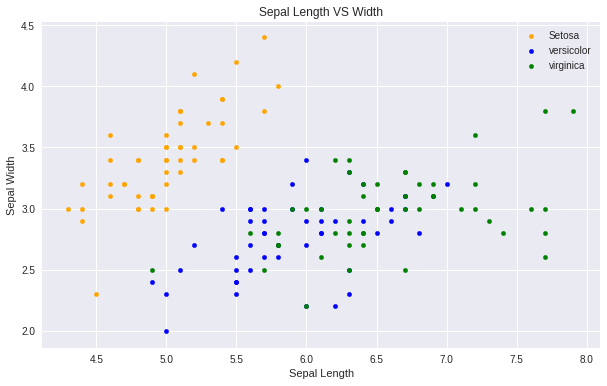

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
iris = pd.read_csv("Iris.csv")
iris.drop('Id',axis=1,inplace=True)
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [0]:
dataset = iris.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]